## Importing Modules
The following modules are imported at the beginning of the code:
- `os`: Operating system module for interacting with the file system.
- `sys`: System-specific parameters and functions.
- `json`: Used for handling JSON files.
- `csv` : For handling CSV files
- `pandas`: Data manipulation and analysis library.
- `numpy`: Numerical computing library.
- `matplotlib.pyplot`: Plotting library for creating static, interactive, and animated visualizations.
- `matplotlib`: Python 2D plotting library.
- `math`: Mathematical functions.
- `IPython.core.interactiveshell`: Interactive shell module for controlling the behavior of the interactive shell.
- `statistics`: Mathematical statistics functions.

## Setting Display Preferences
The following line of code sets the interactive shell's behavior to print out items automatically without explicitly using the 'print' function:
```python
InteractiveShell.ast_node_interactivity = "all"


In [1]:
# Import modules needed for the analysis
import os
import sys
import json
import csv
import ast
import pandas as pd
from pandas import DataFrame
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
import matplotlib
import seaborn as sns
import math
from IPython.core.interactiveshell import InteractiveShell
from datetime import *
import statistics as stats
# This helps auto print out the items without explixitly using 'print'
InteractiveShell.ast_node_interactivity = "all" 
%matplotlib inline

## Checking the JSON if the format is correct

In [4]:
# file_path = 'corrected_endomondoHR.json'
file_path = '2_small_corrected_endomondoHR.json'


if os.path.exists(file_path):
    with open(file_path, 'r') as file:
        for line_number, line in enumerate(file, start=1):
            if line_number > 1:
                break  # Stop after checking the first 10 lines
            try:
                json.loads(line)
            except json.JSONDecodeError as e:
                print(f"Invalid JSON on line {line_number}: {e}")
        else:
            print("All checked lines are valid JSON.")
else:
    print(f"File not found: {file_path}")

{'speed': [6.8652,
  16.4736,
  19.1988,
  20.4804,
  31.3956,
  31.8096,
  24.39,
  23.346,
  26.2368,
  28.4868,
  28.4868,
  27.6624,
  24.8688,
  25.794,
  14.0868,
  23.346,
  26.4168,
  31.8096,
  32.1084,
  32.274,
  30.9672,
  29.0016,
  27.5436,
  34.6464,
  31.6404,
  30.3696,
  26.4816,
  26.8128,
  26.172,
  24.1956,
  33.9804,
  29.4048,
  21.2112,
  19.4328,
  27.3456,
  29.6784,
  33.5988,
  23.4864,
  21.7512,
  29.7936,
  31.1256,
  32.58,
  32.8608,
  30.0276,
  28.5192,
  29.7324,
  21.0744,
  19.8756,
  19.7712,
  19.1304,
  18.486,
  23.3892,
  25.6068,
  27.5364,
  25.83,
  29.8764,
  23.2416,
  19.3788,
  17.892,
  16.2864,
  15.0408,
  14.6952,
  15.192,
  14.7816,
  18.918,
  25.83,
  30.204,
  35.8488,
  41.2632,
  43.1172,
  43.5888,
  41.9328,
  31.1544,
  25.3296,
  25.3044,
  27.828,
  21.7836,
  21.006,
  23.2596,
  31.7556,
  13.7628,
  17.5536,
  20.9088,
  19.7748,
  18.7128,
  22.914,
  31.4928,
  32.3676,
  33.498,
  21.762,
  21.3984,
  18.9612,
  1

## Keeping only some lines for faster exploration

In [1]:
json_file = 'corrected_endomondoHR.json'
smaller_json_file = '2_small_corrected_endomondoHR.json'
number_of_lines = 10

# For bigger sized samples:
number_of_lines = 1000
smaller_json_file = (f'2_{number_of_lines}_corrected_endomondoHR.json')



def create_smaller_json_file(original_file, new_file, num_lines):
    with open(original_file, 'r') as infile, open(new_file, 'w') as outfile:
        for i, line in enumerate(infile):
            if i < num_lines:
                outfile.write(line)
            else:
                break

# Create the smaller JSON file
create_smaller_json_file(json_file, smaller_json_file, number_of_lines)

print(f'Successfully created {smaller_json_file} with the first {number_of_lines} lines of {json_file}')

Successfully created 2_1000_corrected_endomondoHR.json with the first 1000 lines of corrected_endomondoHR.json


## Transform file to CSV (optional)

In [31]:
json_file = '2_small_corrected_endomondoHR.json'
csv_file = '3_small_corrected_endomondoHR.csv'

# Read the JSON file into a pandas DataFrame
df = pd.read_json(json_file, lines=True)

# Write the DataFrame to a CSV file
df.to_csv(csv_file, index=False)

print(f"Successfully converted {json_file} to {csv_file}")

Successfully converted 2_small_corrected_endomondoHR.json to 3_small_corrected_endomondoHR.csv


## Create Dataframe and redefine the types 

In [62]:
csv_file = '3_small_corrected_endomondoHR.csv'
json_file = '2_small_corrected_endomondoHR.json'

# Read the CSV file into a pandas DataFrame
# df = pd.read_csv(csv_file)
df = pd.read_json(json_file, lines=True)


# Function to safely convert string representations of lists back to actual lists of floats/integers
def convert_to_list_of_floats(x):
    try:
        # Convert string representation of list to an actual list
        x = ast.literal_eval(x)
        # Convert all elements to float (or int, depending on your need)
        return list(map(float, x))
    except (ValueError, SyntaxError):
        return x

def convert_to_list_of_ints(x):
    try:
        # Convert string representation of list to an actual list
        x = ast.literal_eval(x)
        # Convert all elements to int
        return list(map(int, x))
    except (ValueError, SyntaxError):
        return x

# Apply the conversion function to the necessary columns
df['speed'] = df['speed'].apply(convert_to_list_of_floats)
df['heart_rate'] = df['heart_rate'].apply(convert_to_list_of_ints)
df['timestamp'] = df['timestamp'].apply(convert_to_list_of_ints)
df['longitude'] = df['longitude'].apply(convert_to_list_of_floats)
df['latitude'] = df['latitude'].apply(convert_to_list_of_floats)

### Create separate lists of lists for each 'list' values

In [99]:
speed_list = df['speed'].tolist()
heart_rate_list = df['heart_rate'].tolist()
timestamp_list = df['timestamp'].tolist()
longitude_list = df['longitude'].tolist()
latitude_list = df['latitude'].tolist()
altitude_list = df['altitude'].tolist()

## Checking DataFrame

In [64]:
df.head()  # Display the first few rows to verify

,speed,altitude,gender,heart_rate,id,url,userId,timestamp,longitude,latitude,sport
0,"[6.8652, 16.4736, 19.1988, 20.4804, 31.3956, 3...","[41.6, 40.6, 40.6, 38.4, 37.0, 34.0, 34.0, 34....",male,"[100, 111, 120, 119, 120, 116, 125, 128, 131, ...",396826535,https://www.endomondo.com/users/10921915/worko...,10921915,"[1408898746, 1408898754, 1408898765, 140889877...","[24.64977040886879, 24.65014273300767, 24.6509...","[60.173348765820265, 60.173239801079035, 60.17...",bike
1,"[9.0792, 13.284, 15.9336, 10.9476, 16.1676, 30...","[38.4, 39.0, 39.0, 38.2, 36.8, 36.8, 36.8, 35....",male,"[100, 105, 111, 110, 108, 115, 126, 130, 132, ...",392337038,https://www.endomondo.com/users/10921915/worko...,10921915,"[1408221682, 1408221687, 1408221699, 140822170...","[24.649855233728886, 24.65015547350049, 24.650...","[60.173247596248984, 60.17320962622762, 60.172...",bike
2,"[4.0464, 13.8204, 16.9776, 19.9404, 28.7856, 3...","[76.4, 73.2, 72.4, 73.0, 73.0, 70.8, 69.2, 69....",male,"[99, 105, 113, 110, 109, 110, 108, 121, 116, 1...",389643739,https://www.endomondo.com/users/10921915/worko...,10921915,"[1407858459, 1407858466, 1407858478, 140785849...","[24.64995657093823, 24.650197718292475, 24.651...","[60.17326201312244, 60.173205351457, 60.172969...",bike
3,"[7.4988, 15.4008, 17.8668, 21.5712, 24.1416, 3...","[28.6, 29.4, 29.4, 29.4, 28.0, 27.0, 25.2, 23....",male,"[99, 105, 113, 109, 112, 116, 116, 114, 114, 1...",386729739,https://www.endomondo.com/users/10921915/worko...,10921915,"[1407432042, 1407432048, 1407432056, 140743206...","[24.649874344468117, 24.650242729112506, 24.65...","[60.173286236822605, 60.17323946580291, 60.173...",bike
4,NaN,"[32.0, 32.0, 32.0, 35.8, 36.2, 36.2, 36.2, 36....",male,"[110, 113, 114, 116, 123, 126, 129, 135, 137, ...",383186560,https://www.endomondo.com/users/10921915/worko...,10921915,"[1406909434, 1406909436, 1406909437, 140690943...","[24.64979832060635, 24.64992195367813, 24.6500...","[60.17329327762127, 60.17327332869172, 60.1732...",bike (transport)


In [65]:
df.dtypes

speed         object
altitude      object
gender        object
heart_rate    object
id             int64
url           object
userId         int64
timestamp     object
longitude     object
latitude      object
sport         object
dtype: object

In [66]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   speed       16 non-null     object
 1   altitude    100 non-null    object
 2   gender      100 non-null    object
 3   heart_rate  100 non-null    object
 4   id          100 non-null    int64 
 5   url         100 non-null    object
 6   userId      100 non-null    int64 
 7   timestamp   100 non-null    object
 8   longitude   100 non-null    object
 9   latitude    100 non-null    object
 10  sport       100 non-null    object
dtypes: int64(2), object(9)
memory usage: 8.7+ KB


### Print amount of gender and sport categories and what each one is
#### Also print the amount of uniques users that are present in the selected sample

In [127]:
gender_categories = df['gender'].nunique()
sport_categories = df['sport'].nunique()
gender_types = df['gender'].unique()
sport_types = df['sport'].unique()

print(f"Number of categories in 'gender': {gender_categories},and the gender is/are {gender_types}")
print(f"Number of categories in 'sport': {sport_categories}, and the sports is/are {sport_types}")

id = df['userId'].nunique()
print(f"Number of unique IDs: {id}")


Number of categories in 'gender': 1,and the gender is/are ['male']
Number of categories in 'sport': 3, and the sports is/are ['bike' 'bike (transport)' 'run']
Number of unique IDs: 2


### Rank from most to least present sports

In [149]:
# Count the occurrences of each sport
sport_counts = df['sport'].value_counts()

# Convert to a DataFrame to make it easier to work with
sport_counts_df = sport_counts.reset_index()
sport_counts_df.columns = ['Sport', 'Count']

# Sort the DataFrame by the count in descending order
sport_counts_df = sport_counts_df.sort_values(by='Count', ascending=False).reset_index(drop=True)

# Print the ranking
sport_counts_df

,Sport,Count
0,run,63
1,bike,25
2,bike (transport),12


### Print the sports by gender

In [150]:
activities_by_gender = df.groupby(['sport', 'gender']).size().reset_index(name='count')

print(activities_by_gender)

              sport gender  count
0              bike   male     25
1  bike (transport)   male     12
2               run   male     63


### Print out the missing values columns in a seperate dataframe

In [148]:
#Many of the columns are clasified as string columns as they are of type 'object' because they contain lists of values.
string_columns = ['gender', 'sport', 'url', 'altitude', 'heart_rate', 'latitude', 'longitude', 'speed', 'timestamp']
numeric_columns = ['id', 'userId']

# Dictionary to store the missing values count
missing_values = {}

# Iterate over each column in the DataFrame
for column in df.columns:
    if column in string_columns:
        # Count missing values (None or NaN) in string columns
        missing_count = df[column].isna().sum()
        missing_values.update({column: missing_count})
    
    elif column in numeric_columns:
        # Count missing values (None, NaN) or zeros in numeric columns
        missing_count = df[column].isin([0, None, np.nan]).sum()
        missing_values.update({column: missing_count})

# Convert the dictionary of missing values into a DataFrame
missing_df = pd.DataFrame(list(missing_values.items()), columns=['Column', 'Missing Values'])
missing_df


,Column,Missing Values
0,speed,84
1,altitude,0
2,gender,0
3,heart_rate,0
4,id,0
5,url,0
6,userId,0
7,timestamp,0
8,longitude,0
9,latitude,0


# Representing the data in graphs

## Visualising the percentage of users for each sport

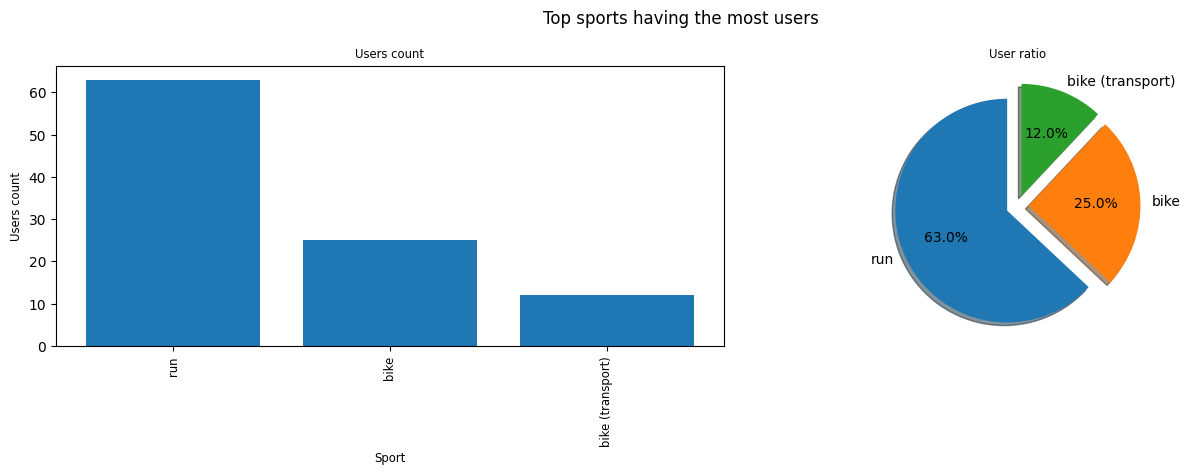

In [132]:
sport_counts = df['sport'].value_counts()

top_n = min(5, len(sport_counts))

# Get the top sports
top_sports = sport_counts.head(top_n)

# Calculate the 'Others' category if there are more than 'top_n' sports
if len(sport_counts) > top_n:
    others_count = sport_counts[top_n:].sum()
    top_sports['others'] = others_count

top_sports_percentages = top_sports / top_sports.sum() * 100

top_sports_df = top_sports_percentages.reset_index()
top_sports_df.columns = ['sport', 'percentage']

# Plotting starts here
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=plt.figaspect(0.35))

# Bar chart of user counts
axs[0].bar(top_sports_df['sport'], top_sports)
axs[0].set_title('Users count', fontsize='small')
axs[0].set_xlabel('Sport', fontsize='small')
axs[0].set_ylabel('Users count', fontsize='small')

axs[0].set_xticks(range(len(top_sports_df['sport'])))
axs[0].set_xticklabels(top_sports_df['sport'], rotation='vertical', fontsize='small')

# Pie chart of user percentages for each sport
explode = [0.1] * len(top_sports_df)
axs[1].pie(
    x=top_sports_df['percentage'],
    labels=top_sports_df['sport'],
    autopct='%1.1f%%', shadow=True, explode=explode, startangle=90
)
axs[1].set_title('User ratio', fontsize='small')

fig.suptitle('Top sports having the most users', fontsize='large')

fig.tight_layout()

plt.show();

## Visualising speed vs heart rate by sport
### First check we have matching information of speed and heart rate and mark which records do not

In [145]:
uncompatible_indexes = []

for i in range(len(speed_list)):
    try:
        if len(speed_list[i]) != len(heart_rate_list[i]):
            uncompatible_indexes.append(i)
    except TypeError:
        uncompatible_indexes.append(i)

df_compatibles = df.drop(index=uncompatible_indexes)
print(f"Number of incompatible indexes: {len(uncompatible_indexes)}")

Number of incompatible indexes: 84


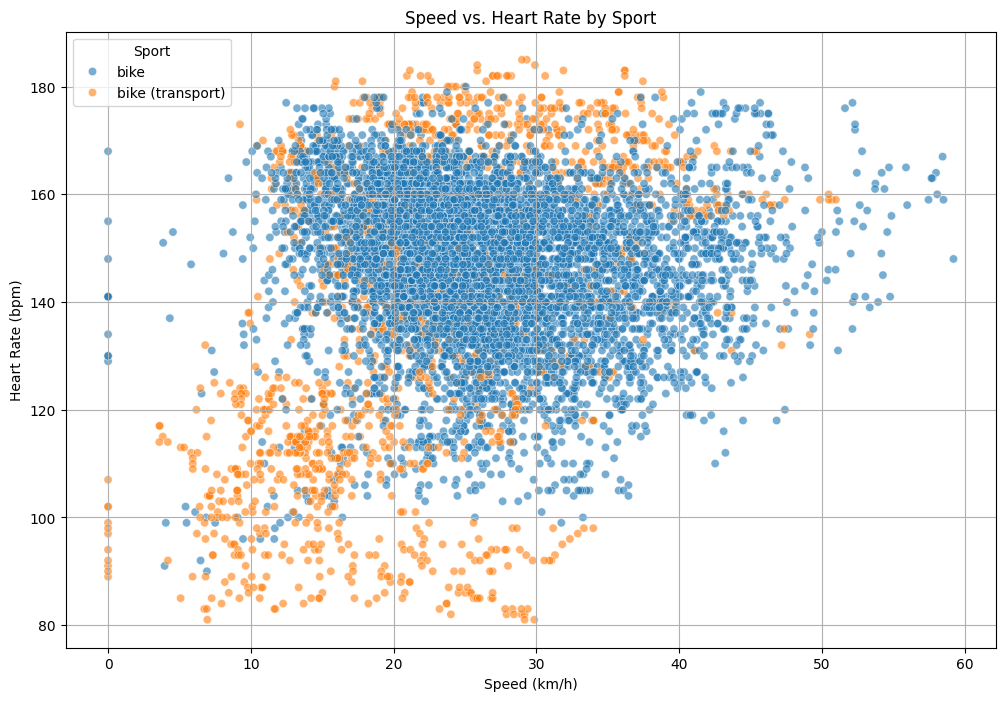

In [147]:
plt.figure(figsize=(12, 8))
sns.scatterplot(data=df_compatibles.explode(['speed', 'heart_rate']), x='speed', y='heart_rate', hue='sport', alpha=0.6)
plt.title('Speed vs. Heart Rate by Sport')
plt.xlabel('Speed (km/h)')
plt.ylabel('Heart Rate (bpm)')
plt.legend(title='Sport')
plt.grid(True)
plt.show();

## Visualising correlation betweem all values (TODO)

In [2]:
# Creating new dataframe with more columns
json_file_medium = '2_medium_corrected_endomondoHR.json'

# Read the CSV file into a pandas DataFrame
# df = pd.read_csv(csv_file)
df_medium = pd.read_json(json_file_medium, lines=True)


# Function to safely convert string representations of lists back to actual lists of floats/integers
def convert_to_list_of_floats(x):
    try:
        # Convert string representation of list to an actual list
        x = ast.literal_eval(x)
        # Convert all elements to float (or int, depending on your need)
        return list(map(float, x))
    except (ValueError, SyntaxError):
        return x

def convert_to_list_of_ints(x):
    try:
        # Convert string representation of list to an actual list
        x = ast.literal_eval(x)
        # Convert all elements to int
        return list(map(int, x))
    except (ValueError, SyntaxError):
        return x

# Apply the conversion function to the necessary columns
df_medium['speed'] = df_medium['speed'].apply(convert_to_list_of_floats)
df_medium['heart_rate'] = df_medium['heart_rate'].apply(convert_to_list_of_ints)
df_medium['timestamp'] = df_medium['timestamp'].apply(convert_to_list_of_ints)
df_medium['longitude'] = df_medium['longitude'].apply(convert_to_list_of_floats)
df_medium['latitude'] = df_medium['latitude'].apply(convert_to_list_of_floats)

In [3]:
# See amount of nulls
df_medium.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   speed       178 non-null    object
 1   altitude    1000 non-null   object
 2   gender      1000 non-null   object
 3   heart_rate  1000 non-null   object
 4   id          1000 non-null   int64 
 5   url         1000 non-null   object
 6   userId      1000 non-null   int64 
 7   timestamp   1000 non-null   object
 8   longitude   1000 non-null   object
 9   latitude    1000 non-null   object
 10  sport       1000 non-null   object
dtypes: int64(2), object(9)
memory usage: 86.1+ KB


In [4]:
# Delete all null values and TODO all incorrect values
df_medium = df_medium.dropna()
df_medium.info()

<class 'pandas.core.frame.DataFrame'>
Index: 178 entries, 0 to 997
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   speed       178 non-null    object
 1   altitude    178 non-null    object
 2   gender      178 non-null    object
 3   heart_rate  178 non-null    object
 4   id          178 non-null    int64 
 5   url         178 non-null    object
 6   userId      178 non-null    int64 
 7   timestamp   178 non-null    object
 8   longitude   178 non-null    object
 9   latitude    178 non-null    object
 10  sport       178 non-null    object
dtypes: int64(2), object(9)
memory usage: 16.7+ KB


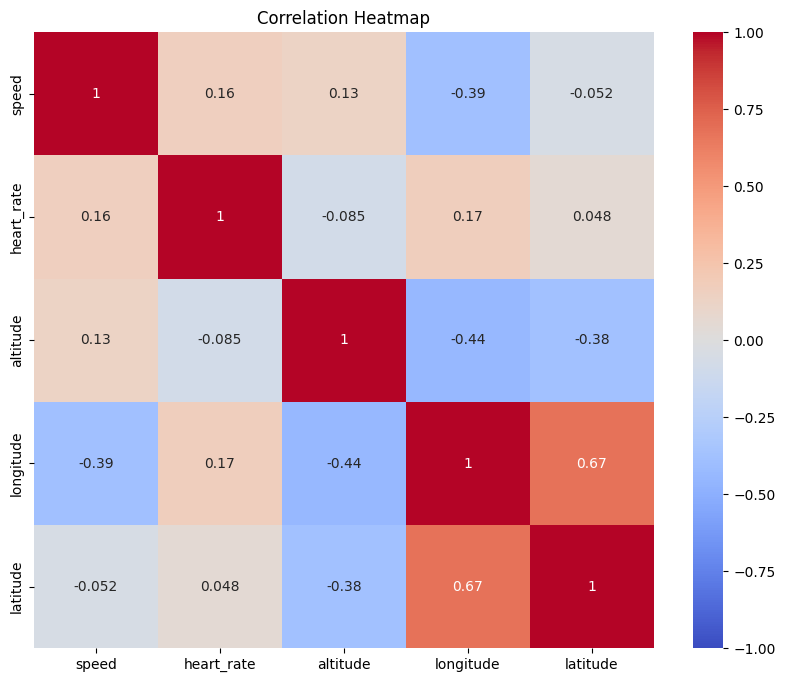

In [7]:
# Delete null values or use averages for rows with missing values

plt.figure(figsize=(10, 8))
correlation_matrix = df_medium[['speed', 'heart_rate', 'altitude', 'longitude', 'latitude']].map(np.mean).corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Heatmap')
plt.show();

## Visualising one record's workout 
### For this visualisation we will need to: 
### 1. Check for a record that has no null values;
### 2. Check that all the records are of the same size;

In [100]:
# Check that all records are of the same size
categories = [longitude_list[0], latitude_list[0], speed_list[0], heart_rate_list[0], timestamp_list[0], altitude_list[0]]
categories_names = ['longitude', 'latitude', 'speed', 'heart_rate', 'timestamp', 'altitude']

for i in range(len(categories)):
    print(f'Length of {categories_names[i]}:', len(categories[i]))

Length of longitude: 500
Length of latitude: 500
Length of speed: 500
Length of heart_rate: 500
Length of timestamp: 500
Length of altitude: 500


### 3. Calculate the distance using the Haversine Distance formula as distance is not provided in the database.

In [95]:
def haversine_distance(lat1, lon1, lat2, lon2):
    """
    Calculate the Haversine distance between two points on the Earth.
    """
    # Convert latitude and longitude from degrees to radians
    lat1, lon1, lat2, lon2 = map(math.radians, [lat1, lon1, lat2, lon2])
    
    # Haversine formula
    dlat = lat2 - lat1
    dlon = lon2 - lon1
    a = math.sin(dlat/2)**2 + math.cos(lat1) * math.cos(lat2) * math.sin(dlon/2)**2
    c = 2 * math.atan2(math.sqrt(a), math.sqrt(1-a))
    r = 6371  # Radius of Earth in kilometers. Use 3956 for miles
    return c * r

def calculate_total_distance(latitudes, longitudes):
    """
    Calculate the total distance covered by a series of lat/long points.
    latitudes and longitudes are lists of coordinates.
    """
    total_distance = 0.0
    for i in range(1, len(latitudes)):
        total_distance += haversine_distance(latitudes[i-1], longitudes[i-1], latitudes[i], longitudes[i])
    return total_distance

# Choose which record to use
latitude_list = latitude_list[0]
longitude_list = longitude_list[0]

# Calculate cumulative distance
total_distance = calculate_total_distance(latitude_list, longitude_list)
print(f"Total distance covered: {total_distance} km")

# Calculate the cumulative distance covered by the user during the workout
cumulative_distances = [0]  # Starting point has 0 distance
for i in range(1, len(latitude_list)):
    distance = haversine_distance(latitude_list[i-1], longitude_list[i-1], latitude_list[i], longitude_list[i])
    cumulative_distances.append(cumulative_distances[-1] + distance)

print(f"Cumulative distances: {cumulative_distances}")
print(f"Length of cumulative distances: {len(cumulative_distances)}")

Total distance covered: 52.89293013433028 km
Cumulative distances: [0, 0.02389194759016344, 0.07524451372932546, 0.13267055681125595, 0.24132141635860638, 0.29764101744232685, 0.4691006640466031, 0.5542335112852925, 0.7022825813576243, 0.8875787056219917, 1.065795061025022, 1.2520887967947805, 1.4083938765792845, 1.4952415542337743, 1.5872954790122817, 1.698666963872081, 1.9050574172516943, 2.1447800702878923, 2.3683178848598234, 2.4750143557906754, 2.589233007088758, 2.741200092443424, 2.9115920392447934, 3.0526856042760837, 3.2323715478321624, 3.3689073829691174, 3.5256241538805164, 3.6346840093166035, 3.7012805842776273, 3.8716878562852735, 4.042232558683265, 4.155437627029131, 4.284703475627358, 4.382604159119716, 4.467417213532465, 4.58393900675724, 4.646947139353584, 4.753741076479422, 4.7970106917078885, 4.9182450167607605, 5.020884896092543, 5.101886888859468, 5.18249633232807, 5.310458118629228, 5.622634752845299, 5.704127286462837, 5.815232262933324, 5.877203687465618, 5.9099

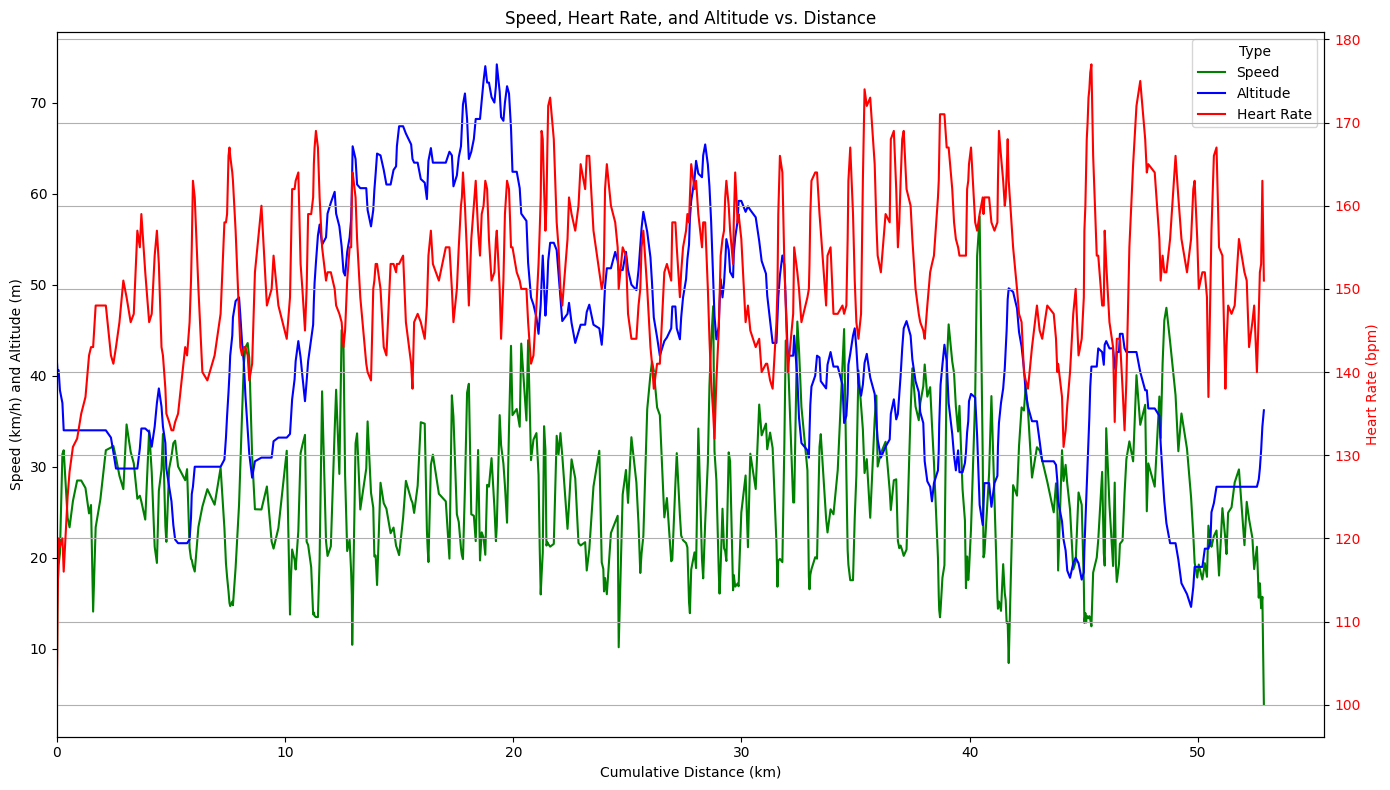

In [153]:
fig, ax1 = plt.subplots()
fig.set_size_inches(14, 8)

# Plot Speed vs. Cumulative Distance on the left Y-axis
ax1.plot(cumulative_distances, speed_list[0], label='Speed', color='green', linestyle='-')
ax1.plot(cumulative_distances, altitude_list[0], label='Altitude', color='blue', linestyle='-')
ax1.set_xlabel('Cumulative Distance (km)')
ax1.set_ylabel('Speed (km/h) and Altitude (m)', color='black')
ax1.tick_params(axis='y', labelcolor='black')

# Create a second y-axis for heart rate
ax2 = ax1.twinx()
ax2.plot(cumulative_distances, heart_rate_list[0], label='Heart Rate', color='red', linestyle='-')
ax2.set_ylabel('Heart Rate (bpm)', color='red')
ax2.tick_params(axis='y', labelcolor='red')

# Add legends for both axes
lines1, labels1 = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()

ax1.legend(lines1 + lines2, labels1 + labels2, title='Type')

ax1.set_xlim(left=0)
ax2.set_xlim(left=0)

plt.title('Speed, Heart Rate, and Altitude vs. Distance')
fig.tight_layout()
plt.grid(True)

plt.show();
